In [1]:
# remove all warnings
import warnings
warnings.filterwarnings("ignore")

# import pandas & numpy library
import pandas as pd
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# read file
import os

# import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# for charts
from pathlib import Path
import plotly.express as px
pd.options.plotting.backend = 'plotly'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from collections import Counter
from itertools import chain

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# for model
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# improve resolution
%config InlineBackend.figure_format ='retina'

In [2]:
country_dat_dict = {}
count = 0
for root, dirs, files  in os.walk("youtube_data"):
    for file in files:
        if file[-3:] == "csv":
            try: 
                data = pd.read_csv(str(root+"/"+ file))
                country_dat_dict[file[:2]] = data
                data["country"] = file[:2]
                count += data.shape[0]
            except:
                continue;

In [3]:
video = pd.concat(country_dat_dict.values(),ignore_index=True)
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239657,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB
239658,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB
239659,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,GB
239660,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB


In [4]:
video.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [5]:
video.describe()

,category_id,views,likes,dislikes,comment_count
count,239662.000000,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,20.002950,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,7.271423,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,24.000000,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,24.000000,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [6]:
video["trending_date"] = video["trending_date"].apply(lambda string: pd.to_datetime(string, format = '%y.%d.%m'))

In [7]:
# Handle missing value
missing_values = video.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(f'Columns with missing value: {missing_columns}')

# Impute missing values in the description column with NaN
video['description'] = video['description'].fillna('NaN')

Columns with missing value: description    7503
dtype: int64


In [8]:
def tagstr_to_list(string:str):
    return [tag.strip('"').strip().lower() for tag in string.split("|")]
    
video["tags"] = video.tags.apply(tagstr_to_list)

In [9]:
video['tags'].iloc[0]

['sharry mann',
 'sharry mann new song',
 'sharry mann cute munda',
 'sharry mann latest song',
 'sharry mann punjabi song 2017',
 'parmish verma',
 'parmish verma new song',
 'parmish verma sharry mann',
 'parmish verma sharry mann new song',
 'parmish verma cute munda',
 'new punjabi song 2017',
 'punjabi song 2017',
 'parmish verma new song 2017',
 'parmish verma latest song 2017',
 'punjabi songs 2017']

In [10]:
video['likes_to_views'] = np.where(video['views'] > 0,
                                   video['likes'] / video['views'],
                                   np.nan)

video['trending_date'] = pd.to_datetime(video['trending_date'], errors='coerce', utc=True)
video['publish_time']   = pd.to_datetime(video['publish_time'],   errors='coerce', utc=True)

idx_last = video.groupby('video_id')['trending_date'].idxmax()
video_latest = video.loc[idx_last].copy()

video_latest['trending_dt_naive'] = video_latest['trending_date'].dt.tz_convert('UTC').dt.tz_localize(None)
video_latest['publish_dt_naive']  = video_latest['publish_time'].dt.tz_convert('UTC').dt.tz_localize(None)

video_latest['days_since_publish'] = (video_latest['trending_dt_naive'] - video_latest['publish_dt_naive']).dt.days

video_latest[['video_id','likes','views','likes_to_views','days_since_publish']].head()

,video_id,likes,views,likes_to_views,days_since_publish
37194,#NAME?,5974,1014376,0.005889,1
22921,#VALUE!,4930,206364,0.023890,2
141129,--2K8l6BWfw,694,4822,0.143924,0
118511,--45ws7CEN0,3837,309197,0.012410,-1
123769,--728h8mnDY,2573,39535,0.065082,1


In [11]:
video_latest

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes_to_views,trending_dt_naive,publish_dt_naive,days_since_publish
37194,#NAME?,2018-06-14 00:00:00+00:00,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12 05:44:19+00:00,"[comedy, action, entertainment, telugu, tollyw...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,IN,0.005889,2018-06-14,2018-06-12 05:44:19,1
22921,#VALUE!,2018-03-21 00:00:00+00:00,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,24,2018-03-18 04:30:00+00:00,"[farzand, marathi movie farzand, marathi movie...",206364,4930,111,252,https://i.ytimg.com/vi/-G7-ryD4x4E/default.jpg,False,False,False,Watch the official teaser of upcoming Marathi ...,IN,0.023890,2018-03-21,2018-03-18 04:30:00,2
141129,--2K8l6BWfw,2018-03-06 00:00:00+00:00,La Relève #2 : Jessica Rodrigues,Georgette Mag,15,2018-03-05 13:37:34+00:00,"[jessica rodrigues, jumping, horse, cheval, po...",4822,694,4,34,https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg,False,False,False,Retrouve-nous sur ➼ http://www.georgettemag.co...,FR,0.143924,2018-03-06,2018-03-05 13:37:34,0
118511,--45ws7CEN0,2018-06-12 00:00:00+00:00,PlayStation E3 2018 Showcase | English,PlayStation Europe,20,2018-06-12 03:11:18+00:00,"[playstation, playstation 4, playstation europ...",309197,3837,516,278,https://i.ytimg.com/vi/--45ws7CEN0/default.jpg,False,False,False,Show starts at 1:13:20.E3 2018 has arrived. Jo...,CA,0.012410,2018-06-12,2018-06-12 03:11:18,-1
123769,--728h8mnDY,2017-12-07 00:00:00+00:00,Rösti - YouCook,YouCook Cuisine,26,2017-12-05 16:30:00+00:00,"[youcook, cuisine, recette, europe de l'ouest,...",39535,2573,51,269,https://i.ytimg.com/vi/--728h8mnDY/default.jpg,False,False,False,Les meilleures choses dans la vie sont les plu...,FR,0.065082,2017-12-07,2017-12-05 16:30:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87067,zzjNCiCqiOs,2017-12-28 00:00:00+00:00,the hell hole,westsidewillz,28,2010-01-24 09:21:55+00:00,"[hell, hole, dirtbikes, moto, hill, climbs, we...",727208,4987,716,354,https://i.ytimg.com/vi/zzjNCiCqiOs/default.jpg,False,False,False,deep in the hillz of one of our old favorite r...,CA,0.006858,2017-12-28,2010-01-24 09:21:55,2894
53118,zzokx9oX77k,2018-02-02 00:00:00+00:00,"Tortë shum e shpejt, lehtë dhe me pak përbërës...",Rimonda Cookbook,22,2018-02-01 21:52:23+00:00,"[shqip, kosovo, torte, e shpejt, leht, shpejt,...",5798,309,15,60,https://i.ytimg.com/vi/zzokx9oX77k/default.jpg,False,False,False,https://www.instagram.com/rimondaa__/\nPërbërë...,DE,0.053294,2018-02-02,2018-02-01 21:52:23,0
140690,zzrPbAUv34s,2018-03-04 00:00:00+00:00,EN ATTENDANT,Valentin En Grand,24,2018-03-03 18:00:09+00:00,"[valentin, valentin en grand, en, grand, en at...",3174,783,2,139,https://i.ytimg.com/vi/zzrPbAUv34s/default.jpg,False,False,False,Mon blog : http://ecriveurreveur.blogspot.fr/\...,FR,0.246692,2018-03-04,2018-03-03 18:00:09,0
146059,zztX9Vs1JDc,2018-03-31 00:00:00+00:00,6 Astuces stupides mais qui ont le mérite de f...,Mr.Tom,26,2018-03-30 16:30:05+00:00,"[astuces stupides, astuces, fais le toi-même, ...",3439,182,17,17,https://i.ytimg.com/vi/zztX9Vs1JDc/default.jpg,False,False,False,6 Astuces stupides mais qui ont le mérite de f...,FR,0.052922,2018-03-31,2018-03-30 16:30:05,0


# features

In [12]:
median_ratio = video_latest['likes_to_views'].median()

video_latest['above_median_engagement'] = (video_latest['likes_to_views'] > median_ratio).astype(int)

In [13]:
features = [
    'comment_count', 'days_since_publish',
    'category_id', 'comments_disabled', 'ratings_disabled'
]

X = video_latest[features]
y = video_latest['above_median_engagement']

In [14]:
X = X.fillna(0)

## EDA

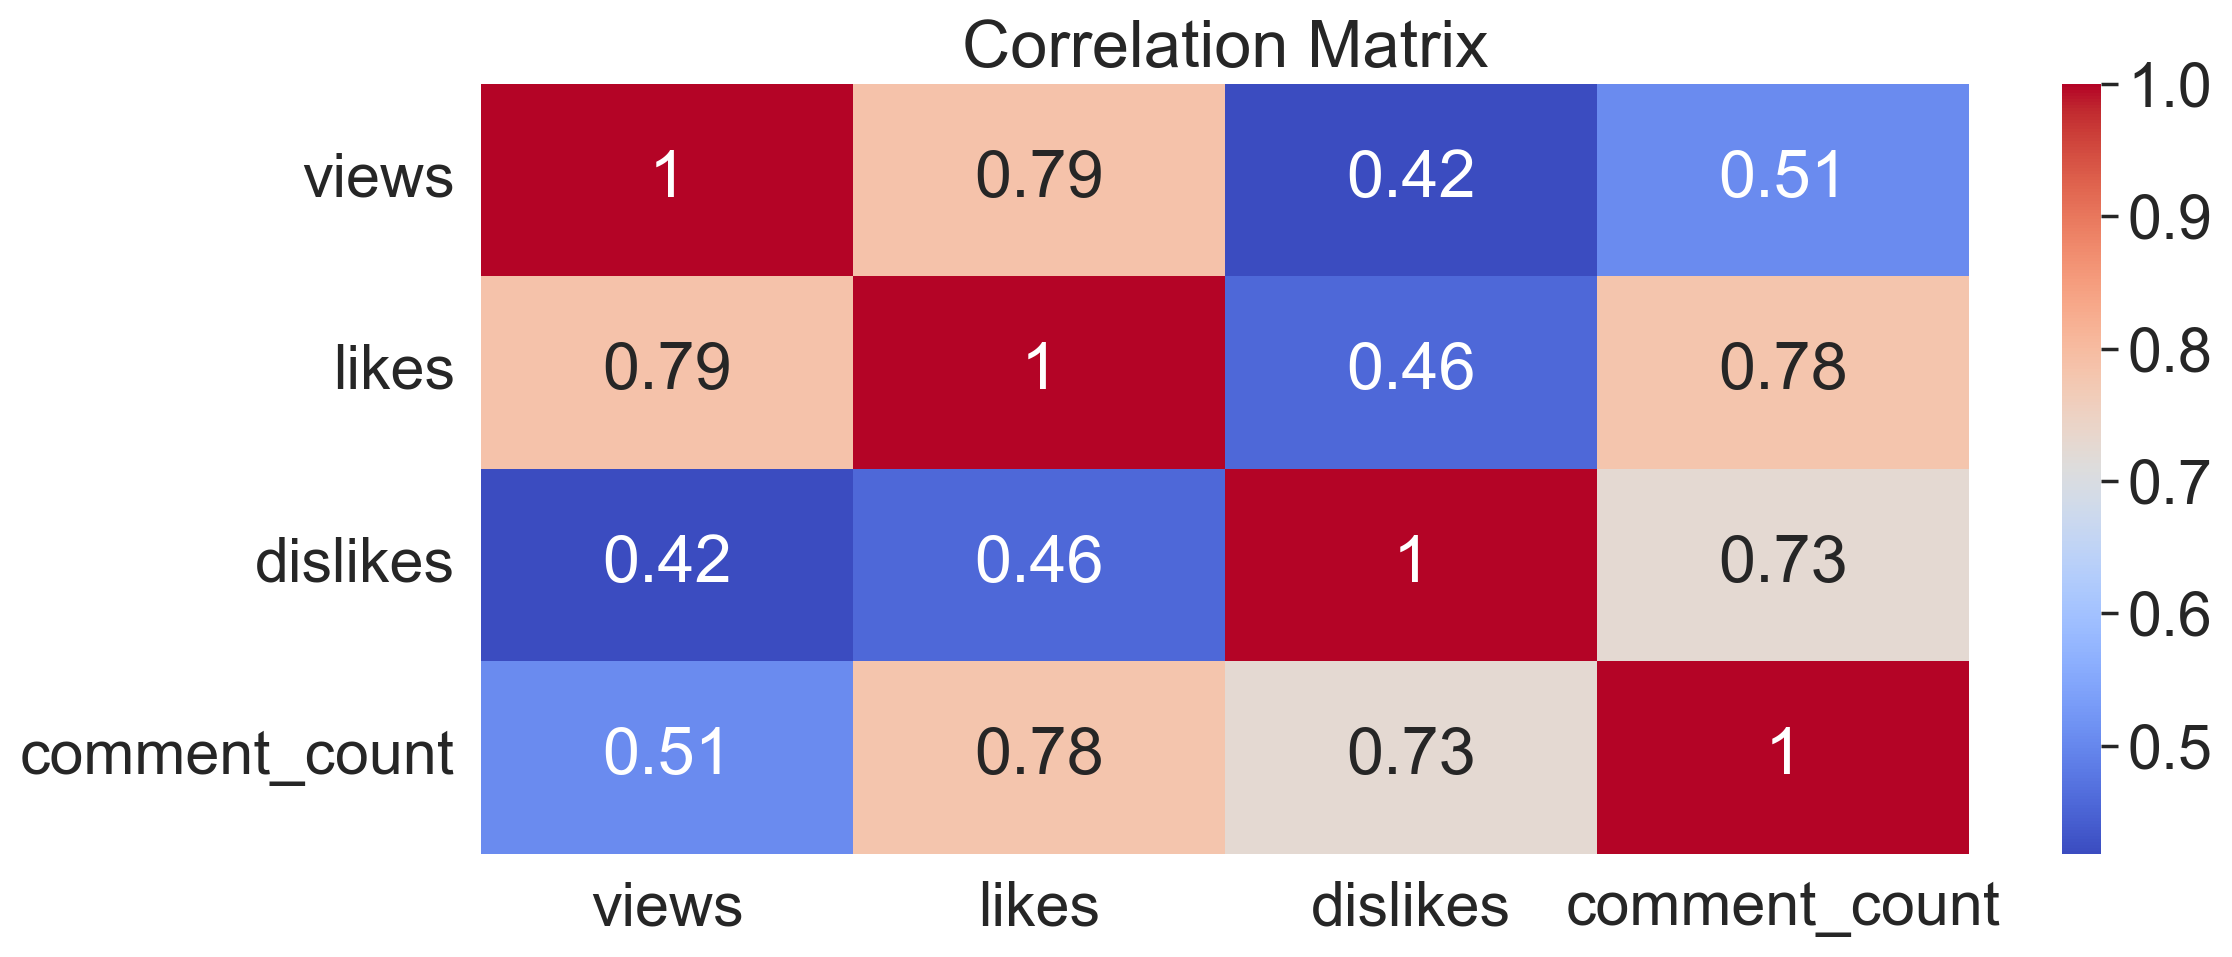

In [15]:
correlation = video[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

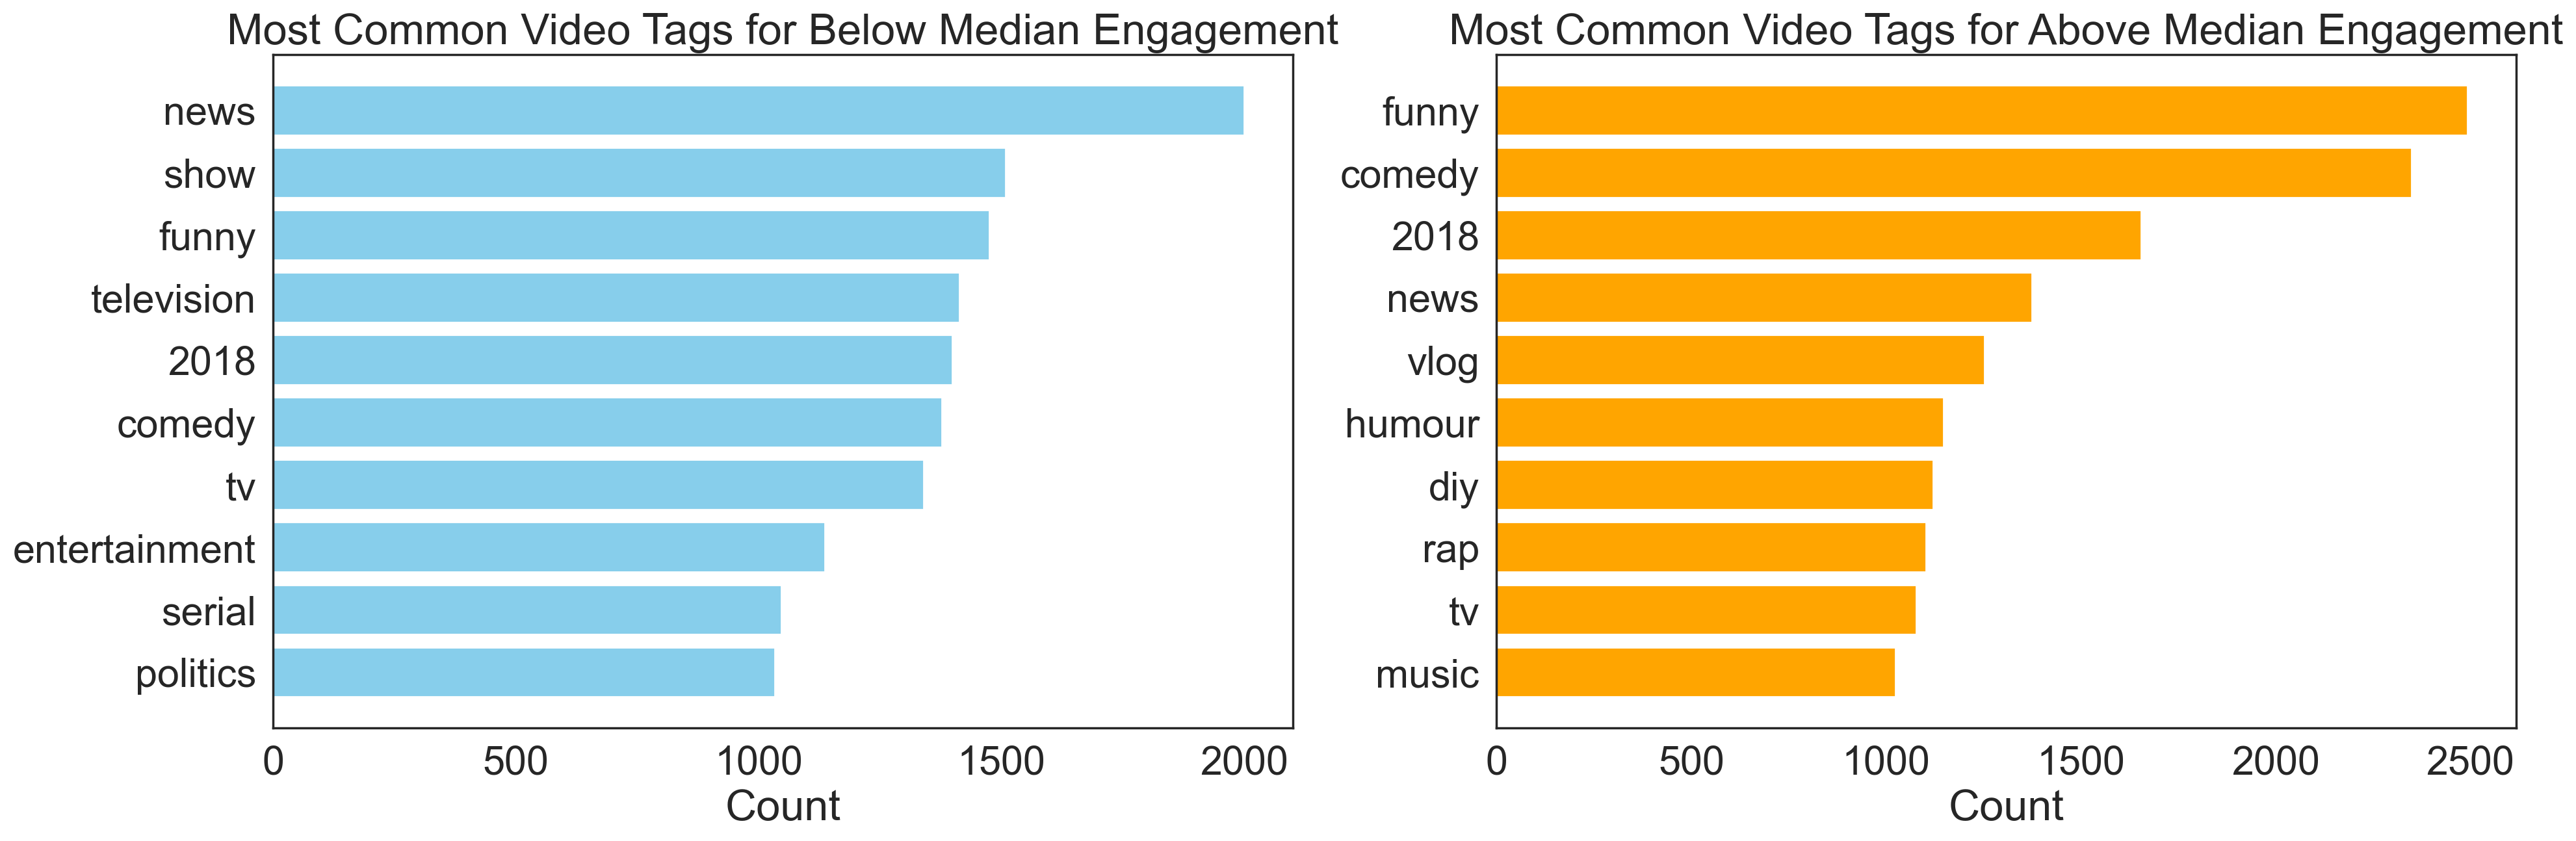

In [16]:
# Separate by engagement
above = video_latest[video_latest['above_median_engagement'] == 1]['tags']
below = video_latest[video_latest['above_median_engagement'] == 0]['tags']

# Remove 'none'
def remove_none(tags):
    return [t for t in tags if t.lower() != '[none]']

tags_above = list(chain.from_iterable(remove_none(tags) for tags in above))
tags_below = list(chain.from_iterable(remove_none(tags) for tags in below))

top_n = 10
common_above = Counter(tags_above).most_common(top_n)
common_below = Counter(tags_below).most_common(top_n)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh([t[0] for t in reversed(common_below)], [t[1] for t in reversed(common_below)], color='skyblue')
axes[0].set_title('Most Common Video Tags for Below Median Engagement')
axes[0].set_xlabel('Count')
axes[1].barh([t[0] for t in reversed(common_above)], [t[1] for t in reversed(common_above)], color='orange')
axes[1].set_title('Most Common Video Tags for Above Median Engagement')
axes[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

# Model 2 - Decision Tree

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# create baseline decision tree model
clf = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
clf.fit(X_train, y_train)

# predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6798212956068503
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      9401
           1       0.68      0.69      0.68      9401

    accuracy                           0.68     18802
   macro avg       0.68      0.68      0.68     18802
weighted avg       0.68      0.68      0.68     18802



In [18]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

y_pred_test = clf.predict(X_test)
y_proba_test = clf.predict_proba(X_test)[:, 1]

test_acc = (y_test == y_pred_test).mean()
naive_acc = (y_test == y_test.mode()[0]).mean()

cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (Counts)'
)
fig_cm.update_layout(template='plotly_white', xaxis_title='', yaxis_title='')
fig_cm.show()

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
auc_test = roc_auc_score(y_test, y_proba_test)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})
fig_roc = px.line(roc_df, x='FPR', y='TPR', title=f'ROC Curve (AUC = {auc_test:.3f})')
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1)
fig_roc.update_layout(template='plotly_white')
fig_roc.show()

In [20]:
acc_df = pd.DataFrame({
    'Model': ['Baseline Decision Tree', 'Naive Baseline'],
    'Accuracy': [test_acc, naive_acc]
})
fig_acc = px.bar(
    acc_df, x='Model', y='Accuracy', text='Accuracy',
    title='Accuracy: Model vs. Naive Baseline'
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_acc.show()

In [21]:
fi = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True).reset_index()
fi.columns = ['Feature', 'Importance']
fig_fi = px.bar(
    fi, x='Importance', y='Feature', orientation='h',
    title='Feature Importance (Decision Tree)', text='Importance'
)
fig_fi.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_fi.update_layout(template='plotly_white', xaxis_title='Importance', yaxis_title='Feature')
fig_fi.show()

# Variant 1: Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Variant 1: Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.704074034677162
              precision    recall  f1-score   support

           0       0.74      0.64      0.68      9401
           1       0.68      0.77      0.72      9401

    accuracy                           0.70     18802
   macro avg       0.71      0.70      0.70     18802
weighted avg       0.71      0.70      0.70     18802



In [23]:
y_pred_test = rf.predict(X_test)
y_proba_test = rf.predict_proba(X_test)[:, 1]

test_acc = (y_test == y_pred_test).mean()
naive_acc = (y_test == y_test.mode()[0]).mean()
auc_test = roc_auc_score(y_test, y_proba_test)

print(f"Random Forest Test Accuracy: {test_acc:.4f}")
print(f"Random Forest ROC-AUC: {auc_test:.4f}")

cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (Random Forest)'
)
fig_cm.update_layout(template='plotly_white', xaxis_title='', yaxis_title='')
fig_cm.show()

Random Forest Test Accuracy: 0.7041
Random Forest ROC-AUC: 0.7909


In [24]:
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})
fig_roc = px.line(roc_df, x='FPR', y='TPR', title=f'ROC Curve (Random Forest, AUC = {auc_test:.3f})')
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1)  # baseline
fig_roc.update_layout(template='plotly_white')
fig_roc.show()

In [25]:
acc_df = pd.DataFrame({
    'Model': ['Random Forest', 'Naive Baseline'],
    'Accuracy': [test_acc, naive_acc]
})
fig_acc = px.bar(
    acc_df, x='Model', y='Accuracy', text='Accuracy',
    title='Accuracy: Random Forest vs. Naive Baseline'
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_acc.show()

In [26]:
fi = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True).reset_index()
fi.columns = ['Feature', 'Importance']
fig_fi = px.bar(
    fi, x='Importance', y='Feature', orientation='h',
    title='Feature Importance (Random Forest)', text='Importance'
)
fig_fi.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_fi.update_layout(template='plotly_white', xaxis_title='Importance', yaxis_title='Feature')
fig_fi.show()

# Variant 2 - GBDT

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.6,
    min_samples_leaf=10,
    random_state=42
)
gbdt.fit(X_train, y_train)

y_pred = gbdt.predict(X_test)
y_proba = gbdt.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"GBDT Accuracy: {acc:.4f}")
print(f"GBDT ROC-AUC : {auc:.4f}")
print(classification_report(y_test, y_pred))

GBDT Accuracy: 0.7152
GBDT ROC-AUC : 0.8048
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      9401
           1       0.72      0.71      0.71      9401

    accuracy                           0.72     18802
   macro avg       0.72      0.72      0.72     18802
weighted avg       0.72      0.72      0.72     18802



In [28]:
fi = pd.Series(gbdt.feature_importances_, index=features).sort_values(ascending=True).reset_index()
fi.columns = ['Feature', 'Importance']

fig_imp = px.bar(
    fi,
    x='Importance', y='Feature',
    orientation='h',
    title='Feature Importance (GBDT)',
    text='Importance'
)
fig_imp.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_imp.update_layout(template='plotly_white', xaxis_title='Importance', yaxis_title='Feature')
fig_imp.show()

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

fig_roc = px.line(roc_df, x='FPR', y='TPR', title='ROC Curve (GBDT)')
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1)
fig_roc.update_layout(template='plotly_white', xaxis=dict(scaleanchor=None))
fig_roc.show()

In [29]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix

y_pred_gbdt = gbdt.predict(X_test)

cm_gbdt = confusion_matrix(y_test, y_pred_gbdt, labels=[0, 1])
cm_gbdt_df = pd.DataFrame(cm_gbdt,
                          index=['True 0', 'True 1'],
                          columns=['Pred 0', 'Pred 1'])

fig_cm_gbdt = px.imshow(
    cm_gbdt_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (GBDT)'
)

fig_cm_gbdt.update_layout(
    template='plotly_white',
    xaxis_title='Predicted label',
    yaxis_title='True label'
)

fig_cm_gbdt.show()

# Variant 3 - Pruned Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

pruned_dt = DecisionTreeClassifier(
    max_depth=None,
    ccp_alpha=0.001,
    random_state=42
)

pruned_dt.fit(X_train, y_train)

# 2) 评估
y_pred = pruned_dt.predict(X_test)
y_proba = pruned_dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"Pruned Tree Accuracy: {acc:.4f}")
print(f"Pruned Tree ROC-AUC : {auc:.4f}")
print(classification_report(y_test, y_pred))

Pruned Tree Accuracy: 0.6996
Pruned Tree ROC-AUC : 0.7738
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      9401
           1       0.71      0.67      0.69      9401

    accuracy                           0.70     18802
   macro avg       0.70      0.70      0.70     18802
weighted avg       0.70      0.70      0.70     18802



In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.inspection import permutation_importance

perm = permutation_importance(pruned_dt, X_test, y_test,
                              n_repeats=5, random_state=42, n_jobs=-1)

fi = (
    pd.Series(perm.importances_mean, index=features)
      .sort_values(ascending=True)
      .reset_index()
)
fi.columns = ['Feature', 'Importance']

fig_imp = px.bar(
    fi, x='Importance', y='Feature', orientation='h',
    title='Permutation Importance (Pruned Decision Tree)', text='Importance'
)
fig_imp.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_imp.update_layout(template='plotly_white',
                      xaxis_title='Importance',
                      yaxis_title='Feature')
fig_imp.show()

# 4) ROC 曲线（px）
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

fig_roc = px.line(
    roc_df, x='FPR', y='TPR',
    title=f'ROC Curve (Pruned Decision Tree, AUC = {auc:.3f})'
)
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1)  # baseline
fig_roc.update_layout(template='plotly_white')
fig_roc.show()

/Users/yvuuuw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/yvuuuw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/yvuuuw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/yvuuuw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/yvuuuw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas re

In [32]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix

y_pred_pruned = pruned_dt.predict(X_test)

cm_pruned = confusion_matrix(y_test, y_pred_pruned, labels=[0, 1])
cm_pruned_df = pd.DataFrame(cm_pruned,
                            index=['True 0', 'True 1'],
                            columns=['Pred 0', 'Pred 1'])

fig_cm_pruned = px.imshow(
    cm_pruned_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (α-Pruned Decision Tree)'
)

fig_cm_pruned.update_layout(
    template='plotly_white',
    xaxis_title='Predicted label',
    yaxis_title='True label'
)

fig_cm_pruned.show()

#  Model Comparison

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import cross_val_score

models = {
    "Decision Tree": clf,
    "Random Forest": rf,
    "GBDT": gbdt,
    "Pruned Tree": pruned_dt
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores)
    cv_error = 1 - cv_mean

    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "ROC-AUC": auc,
        "CV Accuracy (mean)": cv_mean,
        "CV Error": cv_error
    })

df_results = pd.DataFrame(results)
print(df_results)

fig_acc = px.bar(
    df_results.melt(id_vars='Model', value_vars=['Test Accuracy', 'ROC-AUC']),
    x='Model', y='value', color='variable',
    barmode='group',
    text='value',
    title="Model Comparison: Test Accuracy vs ROC-AUC"
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0,1]))
fig_acc.show()

fig_cv = px.bar(
    df_results.sort_values('CV Error'),
    x='Model', y='CV Error',
    text='CV Error',
    title="Model Comparison: Cross-Validation Error (Lower is Better)"
)
fig_cv.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_cv.update_layout(template='plotly_white', yaxis=dict(range=[0, 0.5]))
fig_cv.show()

           Model  Test Accuracy   ROC-AUC  CV Accuracy (mean)  CV Error
0  Decision Tree       0.679821  0.753901            0.679223  0.320777
1  Random Forest       0.704074  0.790878            0.703544  0.296456
2           GBDT       0.715243  0.804773            0.718822  0.281178
3    Pruned Tree       0.699553  0.773808            0.703490  0.296510


In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "Decision Tree": clf,
    "Random Forest": rf,
    "GBDT": gbdt,
    "Pruned Tree": pruned_dt
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores)
    cv_error = 1 - cv_mean

    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "ROC-AUC": auc,
        "CV Accuracy (mean)": cv_mean,
        "CV Error": cv_error
    })

df_results = pd.DataFrame(results)
print(df_results)

fig_acc = px.bar(
    df_results.melt(id_vars='Model', value_vars=['Test Accuracy', 'ROC-AUC']),
    x='Model', y='value', color='variable',
    barmode='group',
    text='value',
    title="Model Comparison: Test Accuracy vs ROC-AUC"
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0,1]))
fig_acc.show()

fig_cv = px.bar(
    df_results.sort_values('CV Error'),
    x='Model', y='CV Error',
    text='CV Error',
    title="Model Comparison: Cross-Validation Error (Lower is Better)"
)
fig_cv.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_cv.update_layout(template='plotly_white', yaxis=dict(range=[0, 0.5]))
fig_cv.show()

best_row = df_results.loc[df_results['CV Error'].idxmin()]
best_model_name = best_row['Model']

print("\n================ MODEL COMPARISON SUMMARY ================")
print(df_results.to_string(index=False))
print("----------------------------------------------------------")

           Model  Test Accuracy   ROC-AUC  CV Accuracy (mean)  CV Error
0  Decision Tree       0.679821  0.753901            0.679223  0.320777
1  Random Forest       0.704074  0.790878            0.703544  0.296456
2           GBDT       0.715243  0.804773            0.718822  0.281178
3    Pruned Tree       0.699553  0.773808            0.703490  0.296510



================ MODEL COMPARISON SUMMARY ================
        Model  Test Accuracy  ROC-AUC  CV Accuracy (mean)  CV Error
Decision Tree       0.679821 0.753901            0.679223  0.320777
Random Forest       0.704074 0.790878            0.703544  0.296456
         GBDT       0.715243 0.804773            0.718822  0.281178
  Pruned Tree       0.699553 0.773808            0.703490  0.296510
----------------------------------------------------------


In [35]:
from sklearn.metrics import log_loss
import numpy as np

def compute_bic(model, X, y):
    y_proba = model.predict_proba(X)
    ll = -log_loss(y, y_proba, normalize=False)

    k = 0

    if hasattr(model, "estimators_"):
        ests = model.estimators_
        if isinstance(ests, list):
            for est in ests:
                if hasattr(est, "tree_"):
                    k += est.tree_.node_count
        elif isinstance(ests, np.ndarray):
            for est in ests.ravel():
                if hasattr(est, "tree_"):
                    k += est.tree_.node_count
    elif hasattr(model, "tree_"):
        k = model.tree_.node_count
    else:
        k = X.shape[1]

    n = len(y)
    bic = k * np.log(n) - 2 * ll
    return bic

In [36]:
bic_list = []
for name, model in models.items():
    bic_value = compute_bic(model, X_test, y_test)
    bic_list.append(bic_value)

df_results["BIC"] = bic_list
print(df_results[["Model", "Test Accuracy", "ROC-AUC", "CV Error", "BIC"]])

           Model  Test Accuracy   ROC-AUC  CV Error            BIC
0  Decision Tree       0.679821  0.753901  0.320777   22280.138998
1  Random Forest       0.704074  0.790878  0.296456  528223.607781
2           GBDT       0.715243  0.804773  0.281178   78648.800139
3    Pruned Tree       0.699553  0.773808  0.296510   21733.635582


In [37]:
import plotly.express as px

fig_bic = px.bar(
    df_results,
    x='Model',
    y='BIC',
    text='BIC',
    title='Model Comparison: BIC (Lower is Better)',
    color='Model'
)

fig_bic.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig_bic.update_layout(
    template='plotly_white',
    yaxis_title='BIC',
    xaxis_title='Model',
    showlegend=False
)

fig_bic.show()

In [38]:
long_df = df_results.melt(
    id_vars='Model',
    value_vars=['Test Accuracy', 'ROC-AUC', 'CV Accuracy (mean)', 'CV Error'],
    var_name='Metric',
    value_name='Score'
)

fig_line = px.line(
    long_df,
    x='Metric',
    y='Score',
    color='Model',
    markers=True,
    text='Score',
    title='Model Comparison Across Metrics (Line Chart)'
)

fig_line.update_traces(texttemplate='%{text:.3f}', textposition='top center')
fig_line.update_layout(
    template='plotly_white',
    yaxis_title='Score / Error',
    xaxis_title='Metric'
)

fig_line.show()

In [39]:
import plotly.express as px
import pandas as pd

radar_df = df_results.melt(
    id_vars='Model',
    value_vars=['Test Accuracy', 'ROC-AUC', 'CV Accuracy (mean)'],
    var_name='Metric',
    value_name='Score'
)

fig_radar = px.line_polar(
    radar_df,
    r='Score',
    theta='Metric',
    color='Model',
    line_group='Model',
    title='Model Comparison (Radar Chart: Test Acc, CV Acc, AUC)',
)
fig_radar.update_traces(fill='toself')
fig_radar.update_layout(template='plotly_white')
fig_radar.show()

In [40]:
rank_df = df_results[['Model', 'Test Accuracy', 'ROC-AUC', 'CV Accuracy (mean)']]
rank_df['Rank Score'] = (
    rank_df['Test Accuracy']*0.5 +
    rank_df['ROC-AUC']*0.3 +
    rank_df['CV Accuracy (mean)']*0.2
)

fig_rank = px.scatter(
    rank_df.sort_values('Rank Score'),
    x='Rank Score',
    y='Model',
    size='Rank Score',
    color='Model',
    text='Model',
    title='Model Ranking by Composite Score'
)
fig_rank.update_traces(textposition='middle right')
fig_rank.update_layout(template='plotly_white')
fig_rank.show()

In [41]:
heat_df = df_results.set_index('Model')[['Test Accuracy', 'ROC-AUC', 'CV Accuracy (mean)', 'CV Error']]

fig_heat = px.imshow(
    heat_df,
    text_auto='.3f',
    color_continuous_scale='RdBu_r',
    title='Model Comparison Heatmap'
)
fig_heat.update_layout(template='plotly_white')
fig_heat.show()

In [42]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
models = {
    "Decision Tree": clf,
    "Random Forest": rf,
    "GBDT": gbdt,
    "Pruned Tree": pruned_dt
}

def compute_bic(model, X, y):
    y_proba = model.predict_proba(X)
    ll = -log_loss(y, y_proba, normalize=False)

    k = 0
    if hasattr(model, "estimators_"):
        ests = model.estimators_
        if isinstance(ests, list):
            for est in ests:
                if hasattr(est, "tree_"):
                    k += est.tree_.node_count
        elif isinstance(ests, np.ndarray):
            for est in ests.ravel():
                if hasattr(est, "tree_"):
                    k += est.tree_.node_count
    elif hasattr(model, "tree_"):
        k = model.tree_.node_count
    else:
        k = X.shape[1]

    n = len(y)
    bic = k * np.log(n) - 2 * ll
    return bic

rows_summary = []
rows_cv = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    test_acc = accuracy_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_proba)

    cv_res = cross_validate(
        model, X_train, y_train,
        cv=5,
        scoring='accuracy',
        return_train_score=False
    )
    cv_scores = cv_res['test_score']
    cv_mean = cv_scores.mean()
    cv_error = 1 - cv_mean

    for i, s in enumerate(cv_scores, start=1):
        rows_cv.append({
            "Model": name,
            "Fold": i,
            "CV Accuracy": s
        })

    bic_val = compute_bic(model, X_test, y_test)

    rows_summary.append({
        "Model": name,
        "Test Accuracy": test_acc,
        "ROC-AUC": test_auc,
        "CV Accuracy (mean)": cv_mean,
        "CV Error": cv_error,
        "BIC": bic_val
    })

df_results = pd.DataFrame(rows_summary)
cv_df = pd.DataFrame(rows_cv)

print("Summary metrics:")
print(df_results)

fig_cv_box = px.box(
    cv_df,
    x="Model",
    y="CV Accuracy",
    points="all",
    title="Cross-Validation Accuracy by Model (5-fold)",
)
fig_cv_box.update_layout(
    template="plotly_white",
    yaxis_title="CV Accuracy",
    xaxis_title="Model"
)
fig_cv_box.show()

df_results_sorted = df_results.sort_values("CV Error")

fig_bic_scatter = px.scatter(
    df_results_sorted,
    x="CV Error",
    y="BIC",
    color="Model",
    text="Model",
    title="Model Selection: CV Error vs BIC (Lower is Better)",
)
fig_bic_scatter.update_traces(textposition="top center")
fig_bic_scatter.update_layout(
    template="plotly_white",
    xaxis_title="CV Error (1 - CV Accuracy)",
    yaxis_title="BIC"
)
fig_bic_scatter.show()

Summary metrics:
           Model  Test Accuracy   ROC-AUC  CV Accuracy (mean)  CV Error  \
0  Decision Tree       0.679821  0.753901            0.679223  0.320777   
1  Random Forest       0.704074  0.790878            0.703544  0.296456   
2           GBDT       0.715243  0.804773            0.718822  0.281178   
3    Pruned Tree       0.699553  0.773808            0.703490  0.296510   

             BIC  
0   22280.138998  
1  528223.607781  
2   78648.800139  
3   21733.635582  
